# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response=requests.get(query_url+"new york")
json=response.json()
print(json)
data=[]
i=0
for city in cities[:50]:
#    print(city)
   json = requests.get(query_url + city).json()
   i=i+1
   try:
       tempmax=json["main"]['temp_max']
       humidity=json["main"]["humidity"]
       speed=json['wind']["speed"]
       cloudiness=json["clouds"]["all"]
       lat=json["coord"]["lat"]
       country=json['sys']["country"]
       date=json['dt']
       lon=json["coord"]["lon"]
       data.append([city,cloudiness,country,date,humidity,lat,lon,tempmax,speed])
#        data.append([city,temp,temp1,temp2,temp3,temp6,temp4,temp5,temp7])
       print(f"counter {i} || {city}")
       time.sleep(.1)
   except:
       print("city not found")

{'coord': {'lon': -73.99, 'lat': 40.73}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}, {'id': 301, 'main': 'Drizzle', 'description': 'drizzle', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 16.37, 'pressure': 1021, 'humidity': 87, 'temp_min': 15, 'temp_max': 18}, 'visibility': 4828, 'wind': {'speed': 3.1, 'deg': 40}, 'rain': {'1h': 0.47}, 'clouds': {'all': 90}, 'dt': 1570501402, 'sys': {'type': 1, 'id': 6015, 'message': 0.0128, 'country': 'US', 'sunrise': 1570445892, 'sunset': 1570487353}, 'timezone': -14400, 'id': 5128581, 'name': 'New York', 'cod': 200}
counter 1 || lagoa
counter 2 || hithadhoo
counter 3 || ken caryl
counter 4 || ushuaia
counter 5 || arman
counter 6 || cape town
counter 7 || klaksvik
counter 8 || punta arenas
counter 9 || yamada
counter 10 || fairbanks
counter 11 || santander
counter 12 || east london
counter 13 || yakymivka
counter 14 || rikitea
counter 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
data_df=pd.DataFrame(data,columns=["City","Cloudiness","Country", "Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lagoa,0,PT,1570501699,72,37.14,-8.45,22.78,1.00
1,hithadhoo,100,MV,1570501699,75,-0.60,73.08,27.63,7.03
2,ken caryl,1,US,1570501699,19,39.58,-105.11,17.00,5.70
3,ushuaia,90,AR,1570501510,96,-54.81,-68.31,0.00,6.70
4,arman,0,RU,1570501700,62,59.70,150.17,-3.16,1.63


In [7]:
 data_df.count()

City          50
Cloudiness    50
Country       50
Date          50
Humidity      50
Lat           50
Lng           50
Max Temp      50
Wind Speed    50
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 0, 'Latitude')

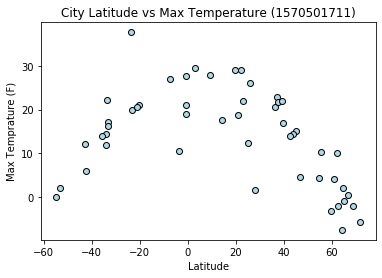

In [8]:
plt.scatter(data_df["Lat"],data_df["Max Temp"],c="lightblue",edgecolor='black')
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.ylabel("Max Temprature (F)")
plt.xlabel("Latitude")


#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity %')

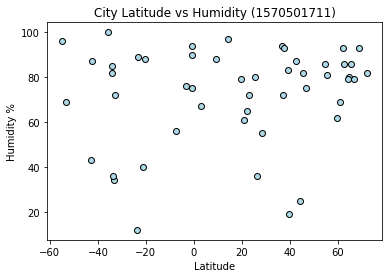

In [9]:
plt.scatter(data_df["Lat"],data_df["Humidity"],c="lightblue",edgecolor='black')
plt.title(f"City Latitude vs Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness %')

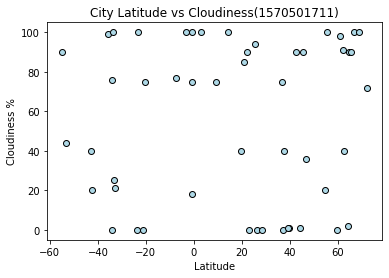

In [10]:
plt.scatter(data_df["Lat"],data_df["Cloudiness"],c="lightblue",edgecolor='black')
plt.title(f"City Latitude vs Cloudiness({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed(mph)')

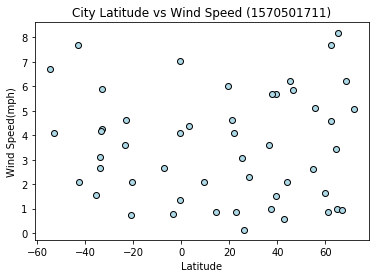

In [11]:
plt.scatter(data_df["Lat"],data_df["Wind Speed"],c="lightblue",edgecolor='black')
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

## Linear Regression

In [12]:
# OPTIONAL: 
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
   # Run regresson on hemisphere weather data.
   (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
   # Calculate the regression line "y values" from the slope and intercept.
   regress_values = x_values * slope + intercept
   # Get the equation of the line.
   line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   # Create a scatter plot and plot the regression line.
   plt.scatter(x_values,y_values)
   plt.plot(x_values,regress_values,"r")
   # Annotate the text for the line equation.
   plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
   plt.title(title)
   plt.xlabel('Latitude')
   plt.ylabel(y_label)
   print(f"The r-squared is: {rvalue:.3f}")
   plt.show()


In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = data_df.loc[(data_df["Lat"] >= 0)]
southern_hemi_df = data_df.loc[(data_df["Lat"] < 0)]
northern_hemi_df
southern_hemi_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,hithadhoo,100,MV,1570501699,75,-0.60,73.08,27.63,7.030
3,ushuaia,90,AR,1570501510,96,-54.81,-68.31,0.00,6.700
5,cape town,0,ZA,1570501700,82,-33.93,18.42,14.44,3.100
7,punta arenas,44,CL,1570501700,69,-53.16,-70.91,2.00,4.100
11,east london,21,ZA,1570501702,72,-33.02,27.91,17.07,4.247
13,rikitea,100,PF,1570501702,89,-23.12,-134.97,19.98,4.610
24,castro,20,CL,1570501705,87,-42.48,-73.76,6.00,2.100
27,jamestown,25,AU,1570501692,34,-33.21,138.60,16.29,5.880
28,mahebourg,75,MU,1570501706,88,-20.41,57.70,21.00,2.100
29,kawalu,77,ID,1570501706,56,-7.38,108.21,27.05,2.651


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.848


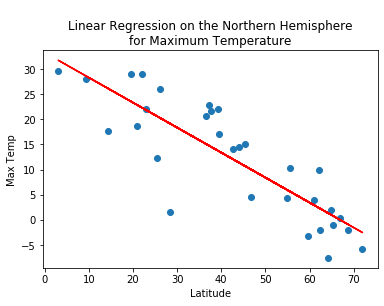

In [14]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_values
y_values

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,40))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.632


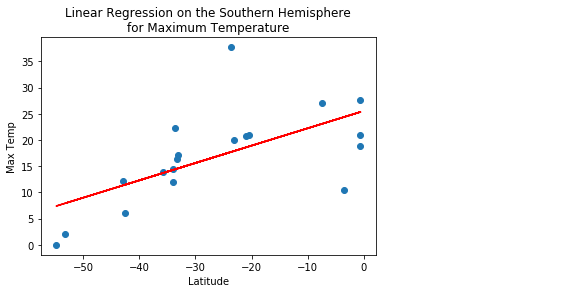

In [15]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_values
y_values

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.192


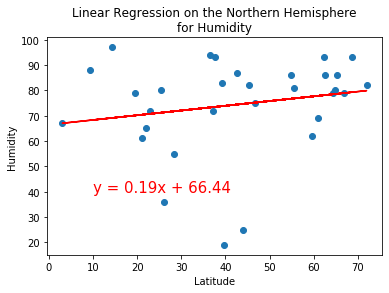

In [16]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_values
y_values

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere\nfor Humidity', 'Humidity',(10,40))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.055


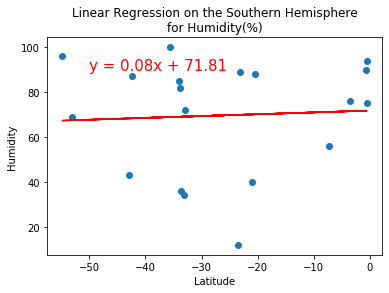

In [17]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_values
y_values

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere\nfor Humidity(%)', 'Humidity',(-50 , 90))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.062


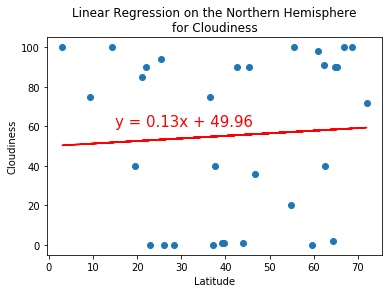

In [22]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_values
y_values

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere\nfor Cloudiness', 'Cloudiness',(15,60))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.170


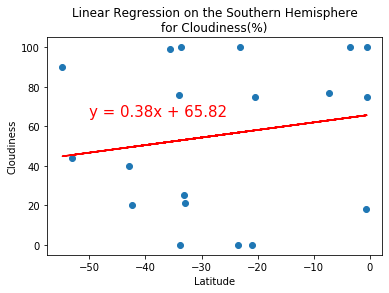

In [23]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_values
y_values

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere\nfor Cloudiness(%)', 'Cloudiness',(-50 , 65))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.208


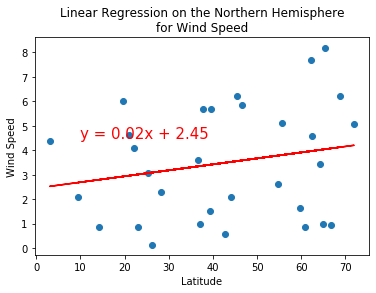

In [28]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_values
y_values

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(10 , 4.5))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.309


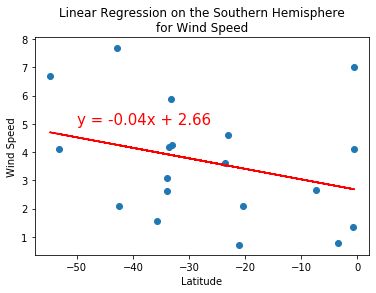

In [31]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_values
y_values

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed',(-50 , 5))